In [20]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Data Collecting / Cleaning

In [21]:
# I worked with a ready-made dataset in this project
def collecting_data():
    url_csv = "/Users/student/PycharmProjects/My Vivino/My-Vivino-project/vivino_top_ten.csv"
    data = pd.read_csv(url_csv)
    return data

df = collecting_data()

In [22]:
# Cleaning columns of dataset
def cleaning_data(dataset):
    dataset['Year'] = dataset['Year'].replace('N.V.', np.NAN)
    dataset['Year'] = pd.to_numeric(dataset['Year'], errors='coerce')
    dataset.drop('Wine_ID', axis=1, inplace=True)
    dataset.drop('Country_Code', axis=1, inplace=True)
    return dataset

df = cleaning_data(df)

In [23]:
df.head()

,Winery,Year,Wine,Rating,Reviews,Price,Region,Primary_Grape,Natural,Country,Style
0,Baron de Ley,2020.0,Rosado de Lágrima 2020,4.2,42,7.15,La Rioja,Malbec,False,Argentina,Rose
1,New Age,NaN,Sweet White N.V.,3.9,5672,7.43,Mendoza,Malbec,False,Argentina,White
2,Alamos,2018.0,Malbec Rosé 2018,3.9,384,8.00,Valle de Uco,Malbec,False,Argentina,Rose
3,Alamos,2019.0,Torrontes 2019,3.8,820,8.00,Salta,Malbec,False,Argentina,White
4,Alamos,2020.0,Cabernet Sauvignon 2020,3.6,489,8.00,Mendoza,Malbec,False,Argentina,Red


In [24]:
df.isnull().sum()

Winery             0
Year             907
Wine               0
Rating             0
Reviews            0
Price              0
Region             0
Primary_Grape      0
Natural            0
Country            0
Style              0
dtype: int64

Data Exploration

In [25]:
# Let's get some information about the dataset
def summarize_dataset(dataset):
    print("Dataset dimension: ", dataset.shape)
    print('\nFirst 5 rows of dataset: '), print(dataset.head(5))
    print('\nInformation about the dataset columns: \n'), print(dataset.info())

summarize_dataset(df)

Dataset dimension:  (12205, 11)

First 5 rows of dataset: 
         Winery    Year                     Wine  Rating  Reviews  Price  \
0  Baron de Ley  2020.0   Rosado de Lágrima 2020     4.2       42   7.15   
1       New Age     NaN         Sweet White N.V.     3.9     5672   7.43   
2        Alamos  2018.0         Malbec Rosé 2018     3.9      384   8.00   
3        Alamos  2019.0           Torrontes 2019     3.8      820   8.00   
4        Alamos  2020.0  Cabernet Sauvignon 2020     3.6      489   8.00   

         Region Primary_Grape  Natural    Country  Style  
0      La Rioja        Malbec    False  Argentina   Rose  
1       Mendoza        Malbec    False  Argentina  White  
2  Valle de Uco        Malbec    False  Argentina   Rose  
3         Salta        Malbec    False  Argentina  White  
4       Mendoza        Malbec    False  Argentina    Red  

Information about the dataset columns: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12205 entries, 0 to 12204
Data columns

In [26]:
# Describe dataset
df.describe()

,Year,Rating,Reviews,Price
count,11298.000000,12205.000000,12205.000000,12205.000000
mean,2016.450611,3.919992,498.468005,42.610824
std,4.882282,0.322382,2333.570088,116.172437
min,1900.000000,1.900000,25.000000,2.070000
25%,2016.000000,3.700000,55.000000,8.950000
50%,2018.000000,3.900000,122.000000,17.900000
75%,2019.000000,4.100000,330.000000,37.000000
max,2021.000000,4.900000,114425.000000,6511.310000


Data Visualization

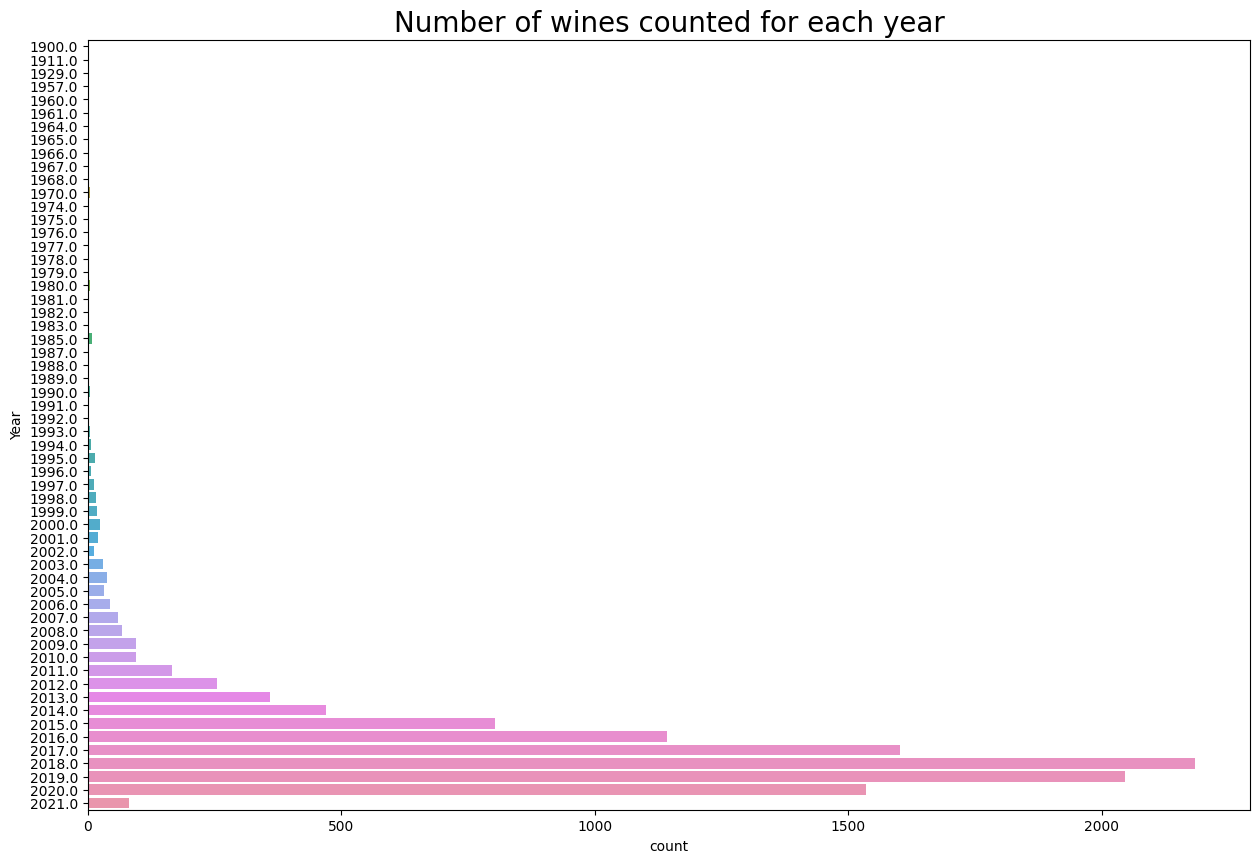

In [27]:
# Plot bar with dataset regions
def count_regions(dataset):
    plt.figure(figsize=(15, 10))
    plt.title('Number of wines counted for each year', fontsize = 20)
    sns.countplot(data=dataset, y="Year")

count_regions(df)

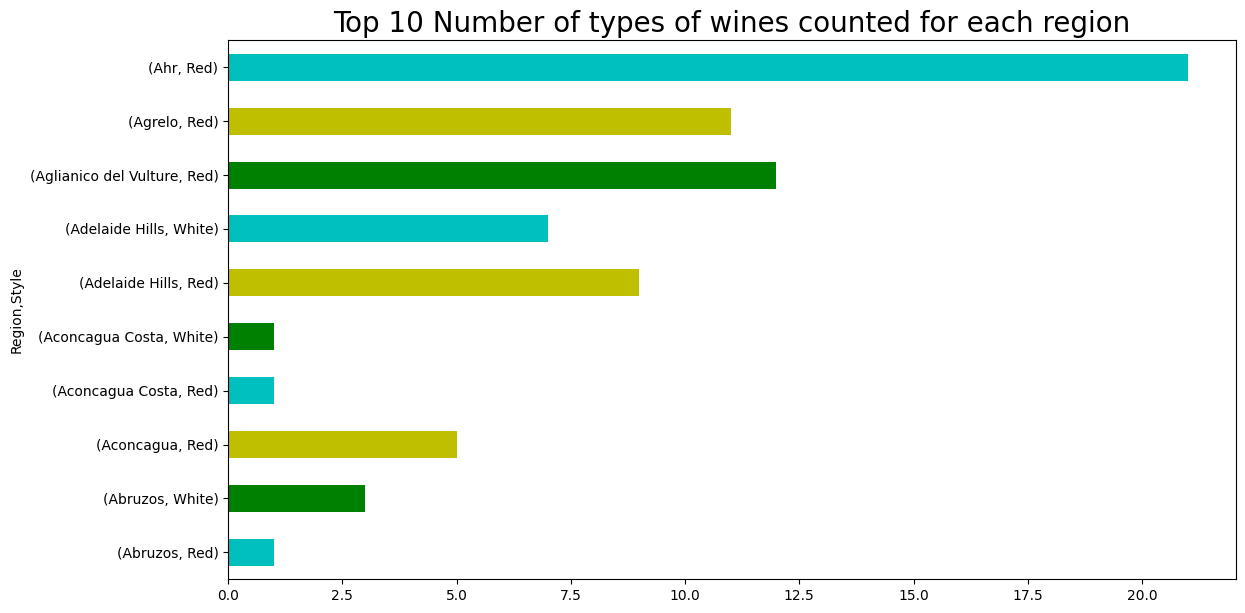

In [28]:
# Plot bar with dataset region
def wine_each_region(dataset):
    plt.figure(figsize=(13, 7))
    plt.title('Top 10 Number of types of wines counted for each region', fontsize = 20)
    plt.xlabel('Count')
    region = dataset.groupby(['Region','Style'])['Wine'].count().head(10)
    region.plot(kind='barh', color=['c', 'g', 'y'])

wine_each_region(df)

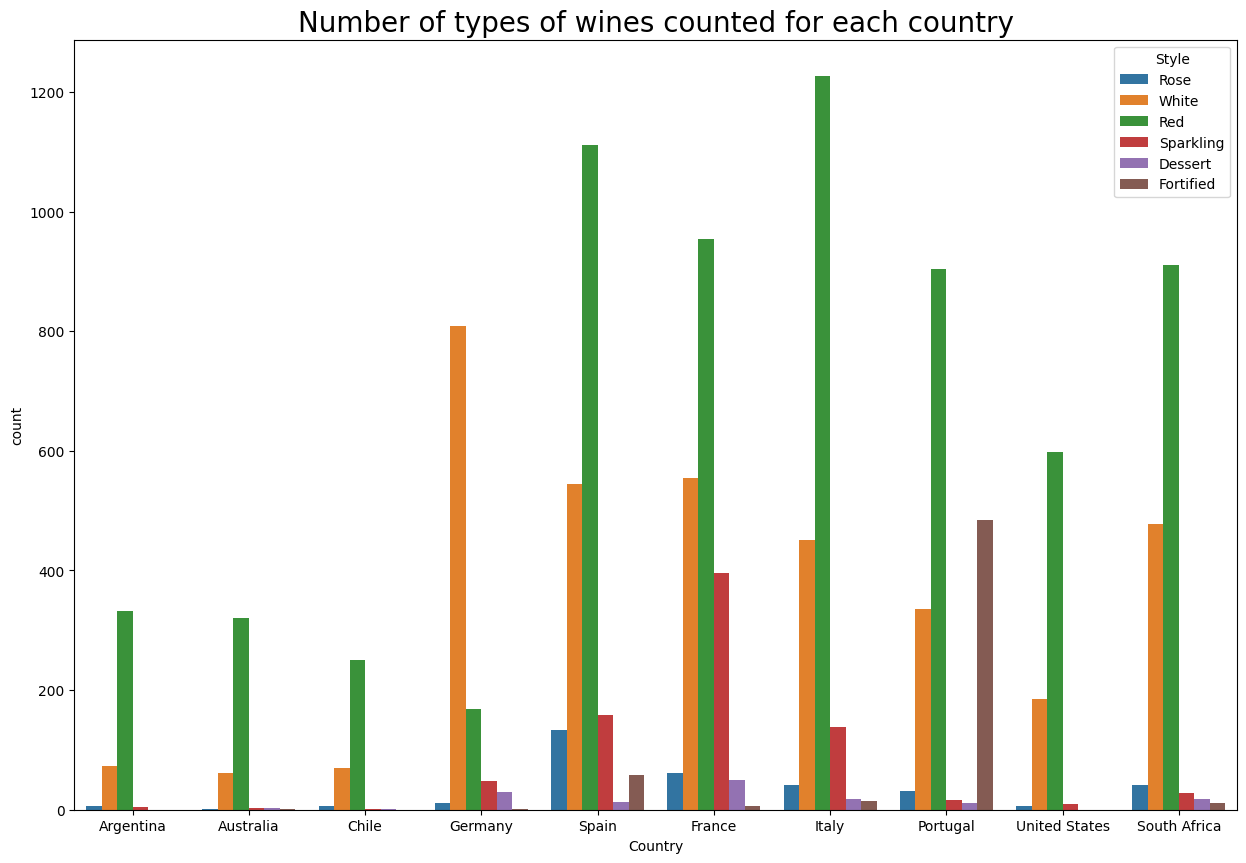

In [29]:
# Plot bar with dataset country
def wine_each_country(dataset):
    plt.figure(figsize=(15, 10))
    plt.title('Number of types of wines counted for each country', fontsize = 20)
    sns.countplot(data=dataset, x='Country', hue='Style')

wine_each_country(df)

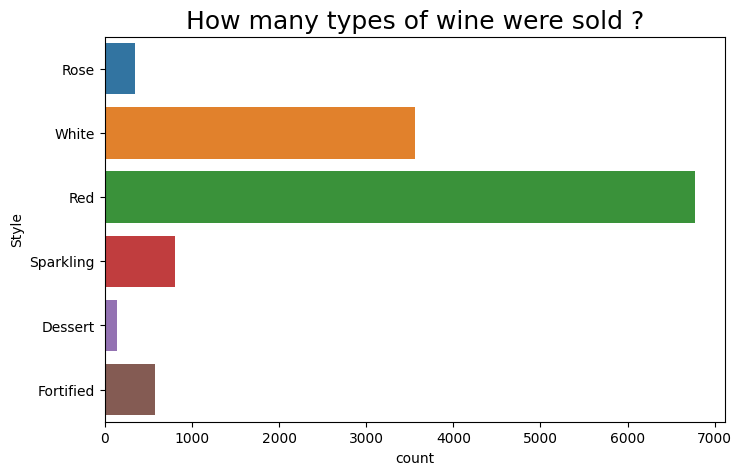

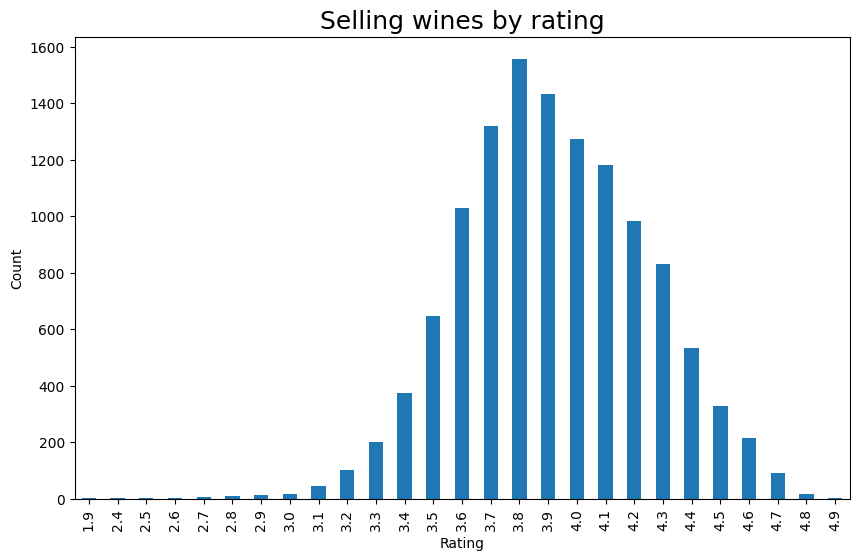

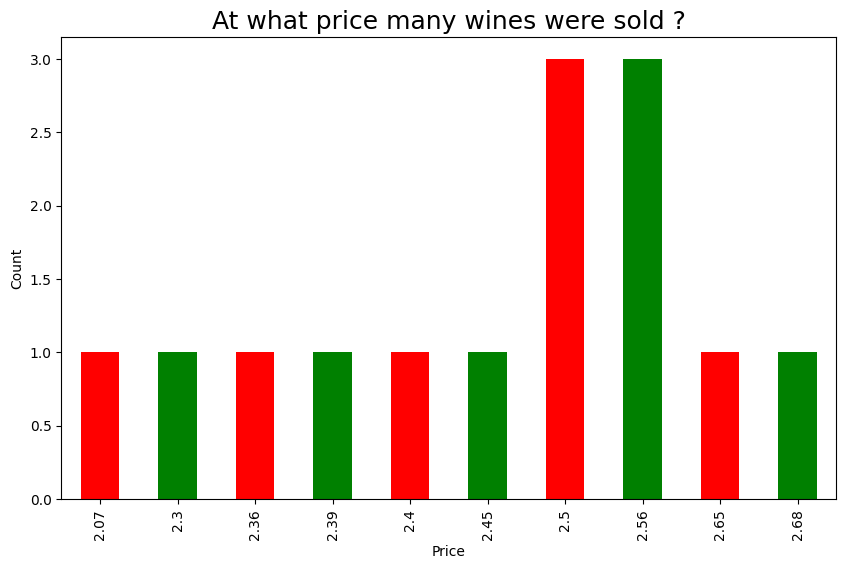

In [30]:
def top_salled_wines(dataset):
    plt.figure(figsize=(8, 5))
    plt.title('How many types of wine were sold ?', fontsize=18)
    sns.countplot(y="Style", data=dataset);

    plt.figure(figsize=(10, 6))
    plt.title('Selling wines by rating',fontsize=18)
    plt.ylabel('Count')
    dd = dataset.groupby(['Rating'])['Wine'].count()
    dd.plot(kind='bar')

    plt.figure(figsize=(10, 6))
    plt.ylabel('Count')
    plt.title('At what price many wines were sold ?', fontsize=18)
    top = dataset.groupby(['Price'])['Wine'].count().head(10)
    top.plot(kind='bar', color=['r', 'g'])

top_salled_wines(df)

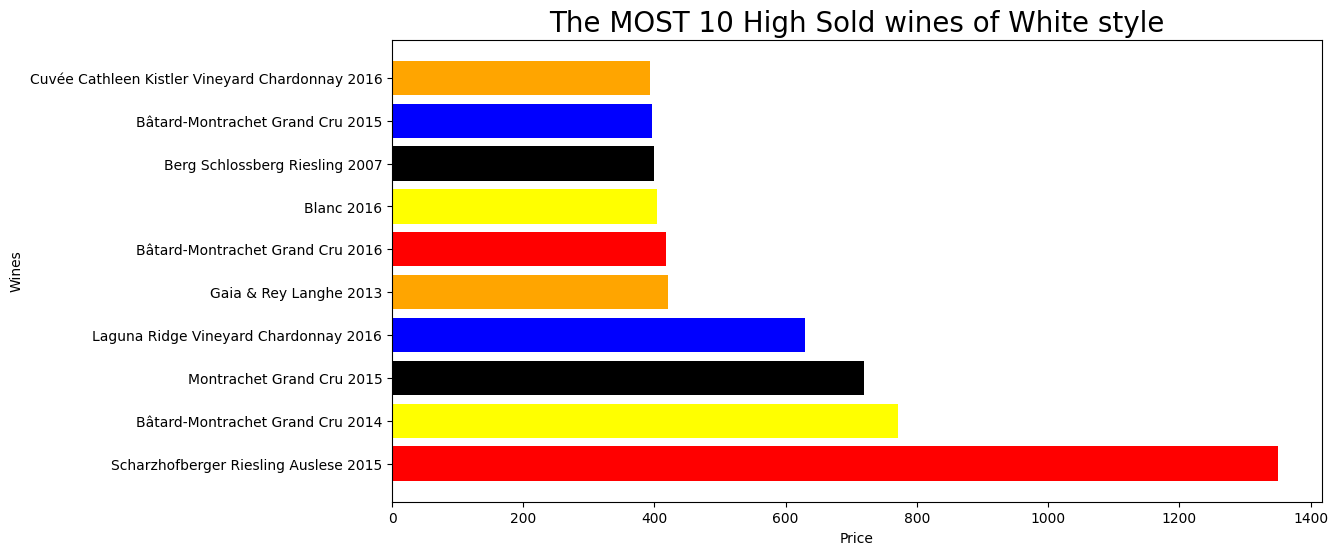

In [31]:
def top_wine(dataset, style):
    c = ['red', 'yellow', 'black', 'blue', 'orange']
    most_reviews = dict(dataset.loc[(dataset['Style'] == style), ['Wine', 'Price']].nlargest(10, 'Price').values)
    vivi, price = list(most_reviews.keys()), list(most_reviews.values())
    fig = plt.figure(figsize = (12, 6))
    plt.barh(vivi,price, color=c)
    plt.title(f'The MOST 10 High Sold wines of {style} style', fontsize = 20)
    plt.ylabel('Wines')
    plt.xlabel('Price')
    plt.show()

top_wine(df,'White')

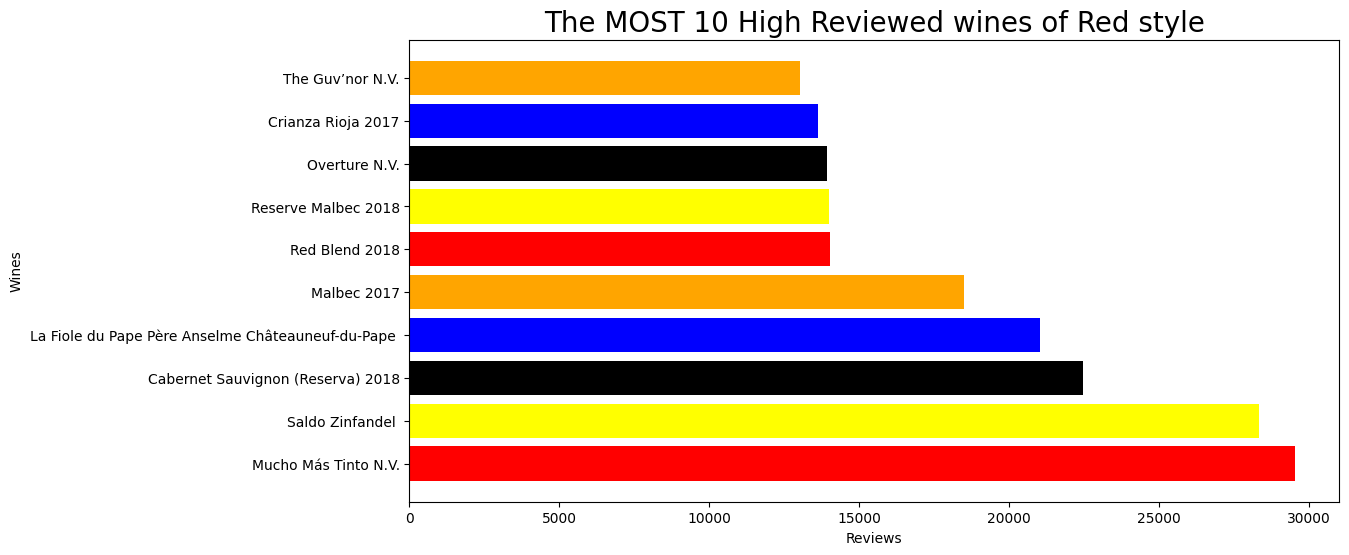

In [32]:
def wine_reviews(dataset, style):
    c = ['red', 'yellow', 'black', 'blue', 'orange']
    most_reviews = dict(dataset.loc[(dataset['Style'] == style), ['Wine', 'Reviews']].nlargest(10, 'Reviews').values)
    vivi, review= list(most_reviews.keys()), list(most_reviews.values())
    fig = plt.figure(figsize = (12, 6))
    plt.barh(vivi,review, color=c)
    plt.title(f'The MOST 10 High Reviewed wines of {style} style', fontsize = 20)
    plt.ylabel('Wines')
    plt.xlabel('Reviews')
    plt.show()

wine_reviews(df,'Red')

/var/folders/fj/1wj07wk52fd0zq08ywrx_v740000gp/T/ipykernel_4494/665539215.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  coor = dataset.corr()


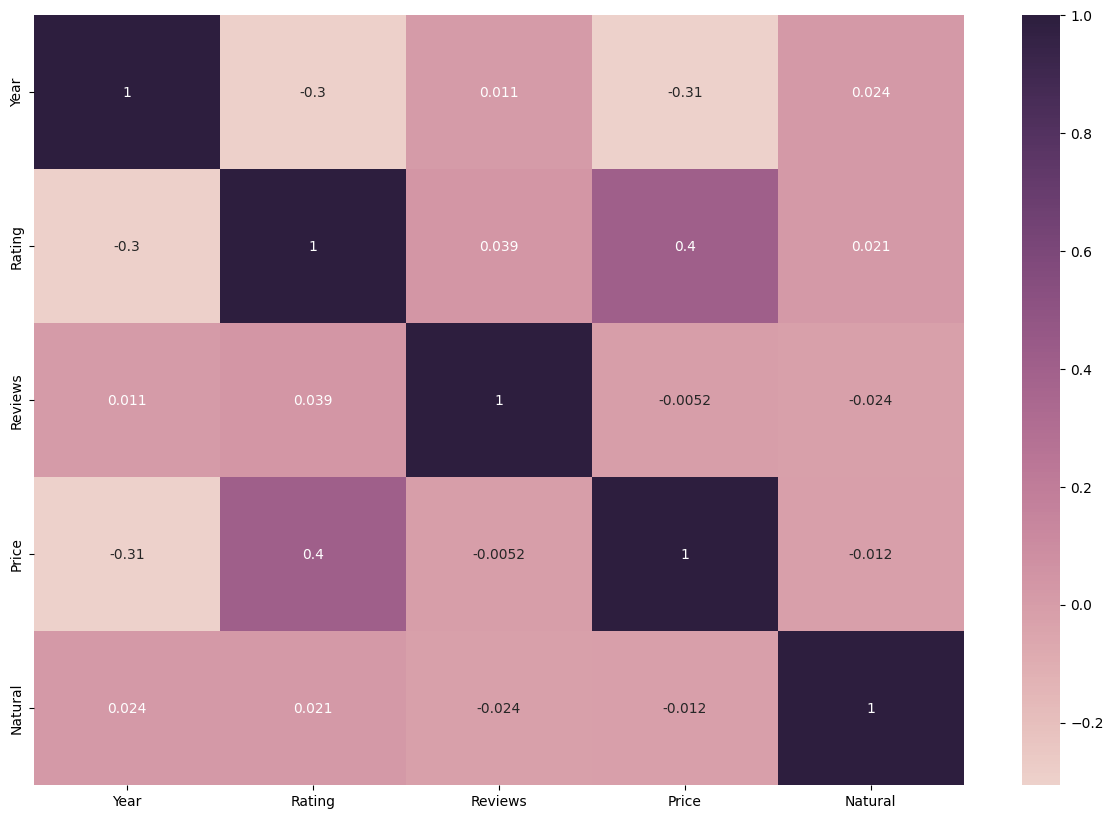

In [33]:
# Correlations Matrix
def compute_correlations_matrix(dataset):
    coor = dataset.corr()
    plt.figure(figsize=(15,10))
    sns.heatmap(coor, annot=True, cmap=sns.cubehelix_palette(as_cmap=True))
    plt.show()
compute_correlations_matrix(df)

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


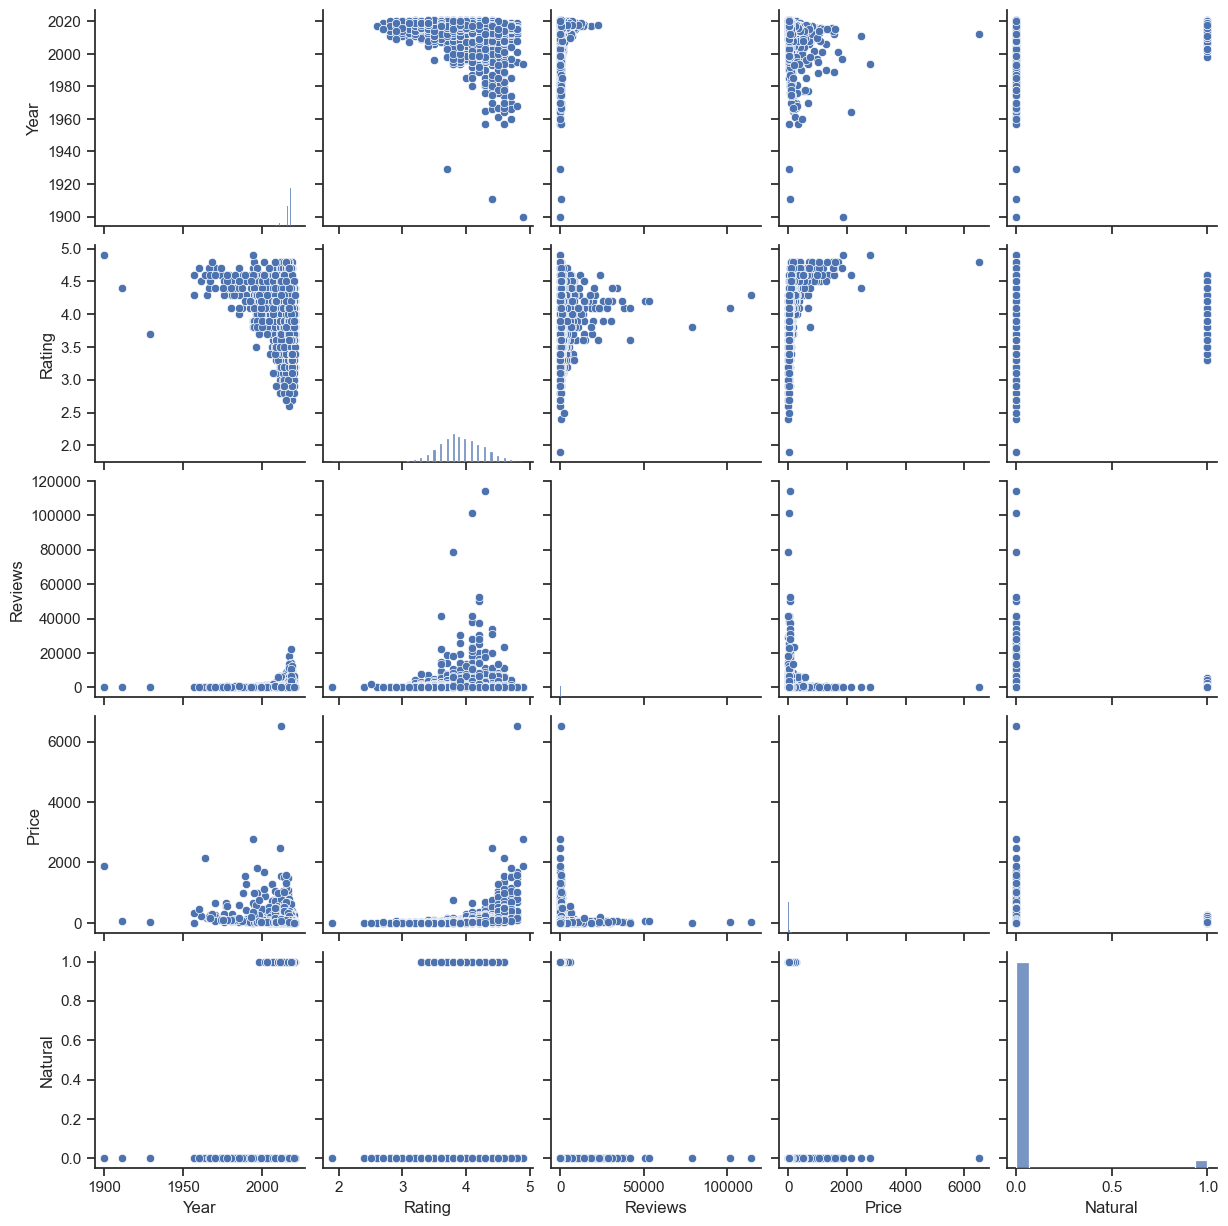

In [42]:
# Scatterplot Matrix
def print_scatter_matrix(dataset):
    # plt.figure(figsize=(20, 10))
    sns.set_theme(style='ticks')
    sns.pairplot(dataset)
    plt.show()

print_scatter_matrix(df)